# HackerSprint 

### Problem Statement :
**Commodity Price Forecasting using AI/ML.INFO:- Commodity price forecasting: use multivariate techniques to forecastfuture prices of steel, oil, etc using economic parameters. Any onecommodity considered is fine too.**


**DataSet : www.macrotrends.ne 2021's Crude Oil Production and Export**


* **Read The Read me file**

Collabrator :
* Ujwal Nikam 
* Rushikesh Adhav
* Kartik Patil
* Mayur Patil

In [ ]:

# Basic Importing 

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crudeoil.csv to crudeoil (1).csv


In [ ]:
data = pd.read_csv("crudeoil.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
3,2000-03-26,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0


In [ ]:
# Inorder to Know the form of data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6244 non-null   object 
 1   Open       5099 non-null   float64
 2   High       5099 non-null   float64
 3   Low        5099 non-null   float64
 4   Close      5099 non-null   float64
 5   Adj Close  5099 non-null   float64
 6   Volume     5099 non-null   float64
dtypes: float64(6), object(1)
memory usage: 341.6+ KB


In [ ]:
# Mean and Standerd deviation 
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5.099000e+03
mean,61.420967,62.331418,60.443248,61.424156,61.424156,2.151295e+06
std,26.177958,26.410581,25.923062,26.174414,26.174414,2.355769e+07
min,1.400000,13.850000,-39.439999,-2.720000,-2.720000,0.000000e+00
25%,40.229999,40.975001,39.410000,40.185000,40.185000,1.025160e+05
50%,58.310001,59.040001,57.360001,58.139999,58.139999,2.459150e+05
75%,81.785000,82.860000,80.524998,81.769997,81.769997,3.917165e+05
max,145.190002,147.270004,142.490005,145.179993,145.179993,4.599355e+08


In [ ]:

# Total Null values
data.isnull().sum()

Date            0
Open         1145
High         1145
Low          1145
Close        1145
Adj Close    1145
Volume       1145
dtype: int64

In [ ]:
data_LSTM = data.dropna()
data_LSTM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0


### From The Above observation We conclude that for the large sum of Missing data
* So We can't Fill the average Values as Deviation is too high and it will lead to wong model
* We cannot Keep the values Empty as it will Outlay the Prediction pattern 
* The best idea is to Drop the missing value as each value denotes is corrs to a Date And Continue with the rest data

In [ ]:
data_missing = data.dropna()

data_missing.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# The New DataSet Is Data Missing 
data_missing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0


# Visualization 

**"Data will Talk with
You if you are
willing to Listine"**

* After cleaning the data we have to Viualize the data
* It helps us to find the Patterns And Prominant Features
* Observation : Closing Price highly depends on opening Price and Day-High  And leaase on Volume -units

Text(0.5, 0.98, 'Correlation matrix of features')

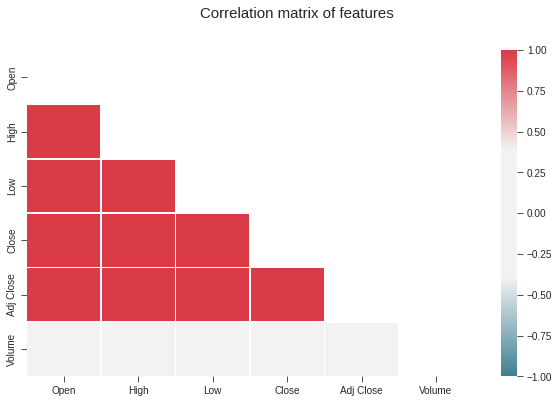

In [ ]:


#In order to predict the Relations And How strong the relation is we use Correelation Metrix  

corr = data_missing.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

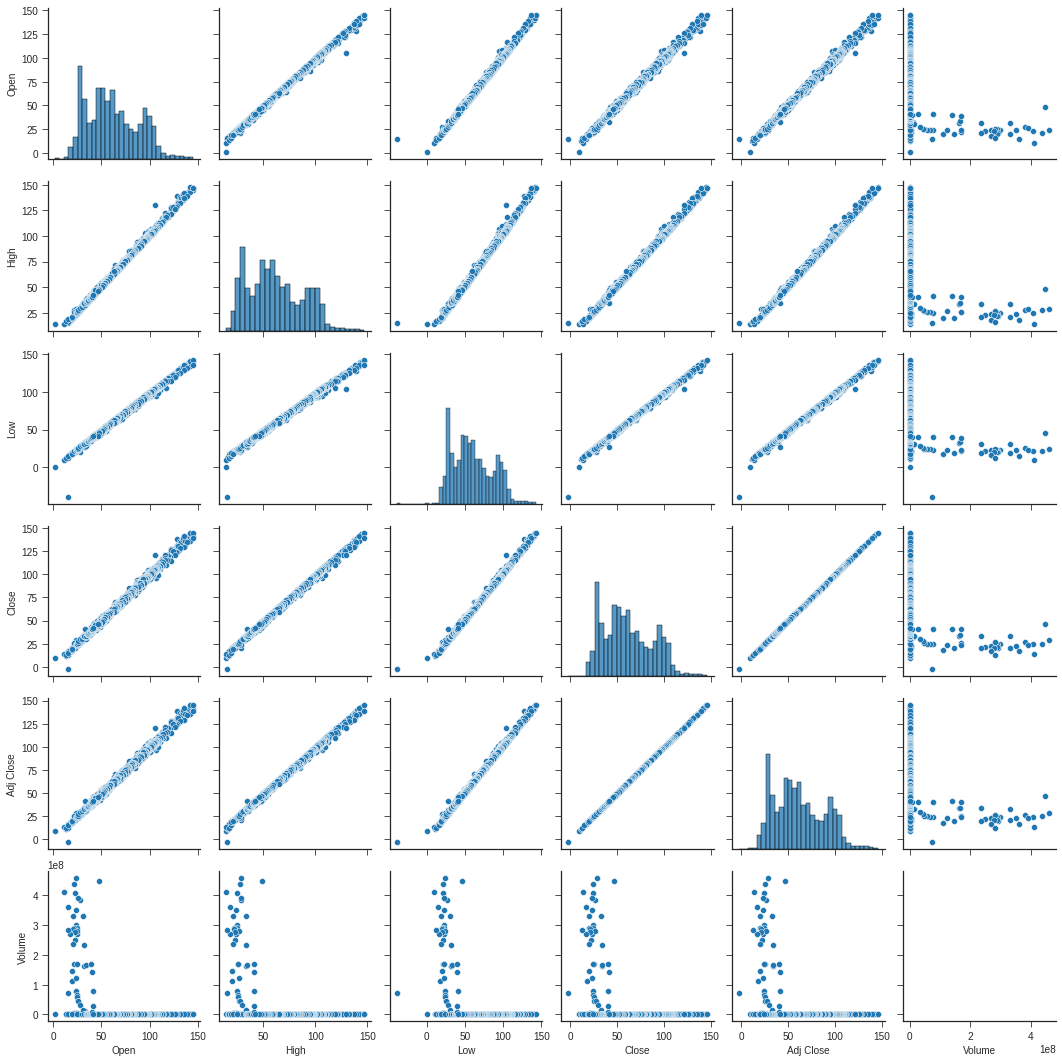

In [ ]:
sns.pairplot(data_missing)

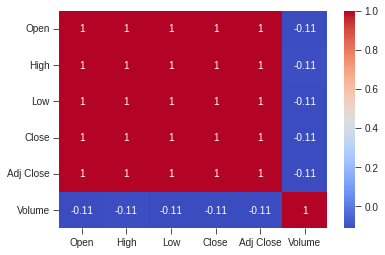

In [ ]:
corr = data_missing.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

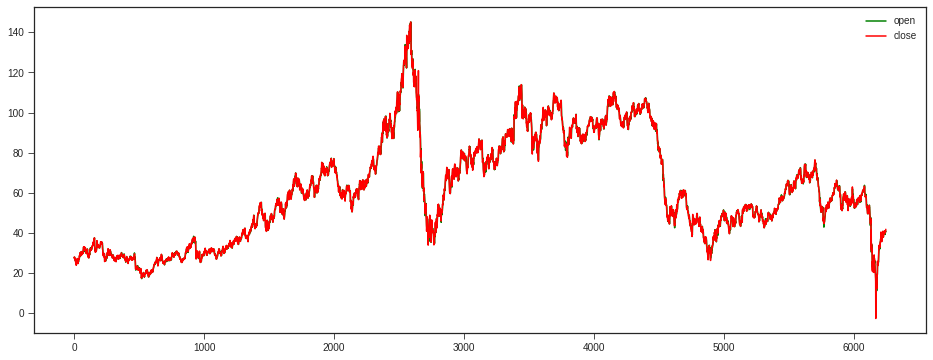

In [ ]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.plot(data_missing['Open'],c='green',label='open')
plt.plot(data_missing['Close'],c='red',label='close')
plt.legend()

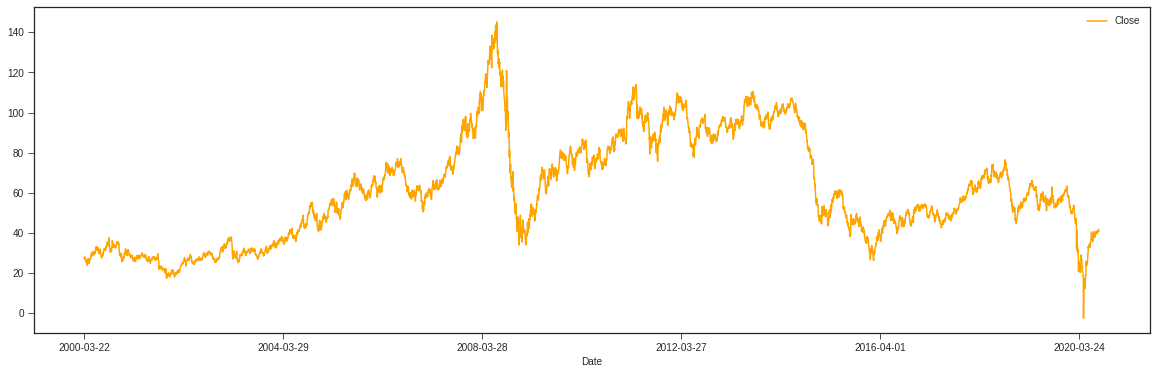

In [ ]:
 plt.style.use('seaborn-ticks')

data_missing.plot(x= "Date",y= "Close",figsize = (20,6),color= "orange")

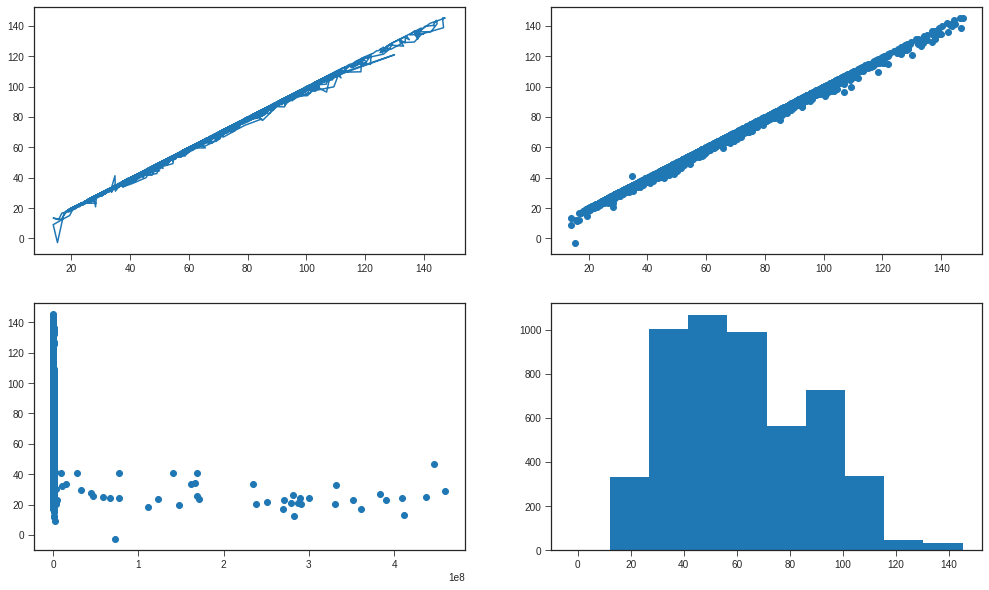

In [ ]:
# subplots 

fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,            # fig, ax = rest same
                                          ncols=2,
                                          figsize = (17,10))

#plotting eaxh plot

ax1.plot(data_missing['High'],data_missing['Close'],label='regr line');                          # ax[0,0].plot(x1,np.exp(x1)); 
ax2.scatter(data_missing['High'],data_missing['Close']);                         # ax[1,0].scatter(x,np.exp(x));
ax3.scatter(data_missing['Volume'],data_missing['Close']);                         # ax[1,0].scatter(x,np.exp(x));
ax4.hist(data_missing["Close"]); 

**Multiple Regression to Predict future closing price of oil**

In [ ]:
X = data_missing[['High','Low','Open','Volume']].values
y = data_missing['Close'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.coef_)

[ 8.58915265e-01  5.64413521e-01 -4.25898034e-01  9.42244061e-11]


In [ ]:
print(regressor.intercept_)

-0.06062551796711091


In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
dataregr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [ ]:
dataregr.head()

,Actual,Predicted
0,45.410000,46.347797
1,65.970001,65.548290
2,48.529999,48.229109
3,27.080000,27.361727
4,103.220001,102.682478


In [ ]:

graph = dataregr.head(10)

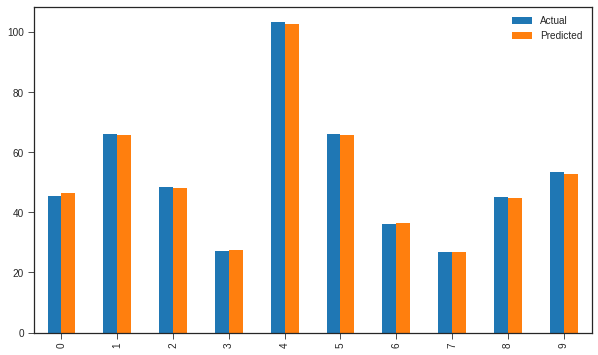

In [ ]:
graph.plot(kind='bar',figsize=(10,6))

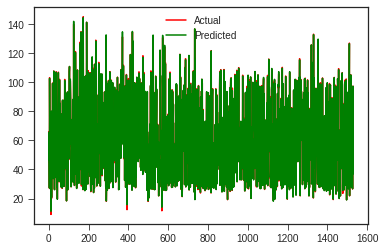

In [ ]:
plt.plot(dataregr['Actual'],c='red',label='Actual')
plt.plot(dataregr['Predicted'],c='green',label='Predicted')
plt.legend()

In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.4155879469700435
Mean Squared Error: 0.34586104966772546
Root Mean Squared Error: 0.5880995236078035


In [ ]:
################## R square value is 0.9999 before implement of PCA ################

print(f"R square value due to overfitting problem",regressor.score(X_test,y_test))

R square value due to overfitting problem 0.9994952697166694


In [ ]:
#Data Standardisation
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit(X)
X_std = X_scaled.transform(X)

In [ ]:
X_std

array([[-1.29057217, -1.280578  , -1.29018004, -0.0874107 ],
       [-1.30836978, -1.28405015, -1.29018004, -0.08795958],
       [-1.2943589 , -1.2690042 , -1.28253927, -0.08896487],
       ...,
       [-0.82101725, -0.7709432 , -0.79391242, -0.09103077],
       [-0.81117182, -0.79524815, -0.80460941,  0.28001778],
       [-0.75474943, -0.75628296, -0.78627161, -0.03512686]])

In [ ]:
X_std.shape

(5099, 4)

In [ ]:
cov_mat = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 1.00019616  0.99886751  0.99957543 -0.10648224]
 [ 0.99886751  1.00019616  0.99911225 -0.11278871]
 [ 0.99957543  0.99911225  1.00019616 -0.10954984]
 [-0.10648224 -0.11278871 -0.10954984  1.00019616]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.5747246  -0.0572969  -0.62989096 -0.51927457]
 [-0.57483237 -0.05087116 -0.13490379  0.80546933]
 [-0.5748666  -0.05419866  0.76487652 -0.28557802]
 [ 0.0937431  -0.99558611  0.00150487  0.00427448]]

Eigenvalues 
[3.01644164e+00 9.82341095e-01 5.93748520e-04 1.40814117e-03]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.0164416364600655
0.982341095266469
0.0014081411734405162
0.0005937485201898171


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

Text(0, 0.5, 'Cumulative explained variance')

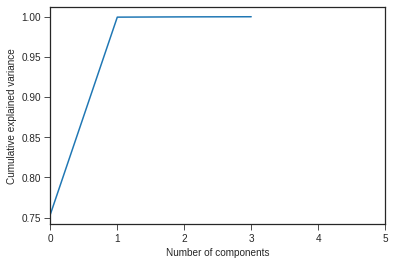

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,10)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scale(X))

In [ ]:
regr = LinearRegression()
#np.random.seed(45)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

1.7107311865154846

In [ ]:
################## R square value after implement of PCA #################

regr.score(X_reduced_train[:,:1], y_train)

0.9957533742966466

# New Data 

As from the Above Vizualization we clearely see that the the correlation is too high and the values are 
too close that finding difference and correct patterns.

### Solution :

* Principal Component Anylisis 
* Mean - Root Method 
* component Sepration  


We find Mean -  Root Method Musch Flexible  As we have to keep the Project simple And PCA is already Implimented 
For This We  Actully Find The Mean Of Dominant Factors then Subtracted thyem form original

`openData_mean = data_missing["Open"].mean()` 

And Squared 

`data_missing["new_open"] = (data_missing["Open"]- openData_mean)**2`

In [ ]:


# Mean Of the Values

openData_mean = data_missing["Open"].mean()
HighData_mean =data_missing["High"].mean()
LowData_mean =data_missing["Low"].mean()

In [ ]:
# Squaring all the undisinctible Parameters in order to increase Variance and Distinctbility


data_missing["new_open"] = (data_missing["Open"]- openData_mean)**2
data_missing["new_High"] = (data_missing["High"]- openData_mean)**2
data_missing["new_Low"] = (data_missing["Low"]- openData_mean)**2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
data_missing.head()

,Date,Open,High,Low,Close,Adj Close,Volume,new_open,new_High,new_Low
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0,1140.478200,1100.313040,1167.654974
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0,1140.478200,1131.714581,1173.813848
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0,1127.009813,1106.957233,1147.242461
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0,1140.478200,1115.624585,1156.745864
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0,1143.857797,1125.667308,1184.802957


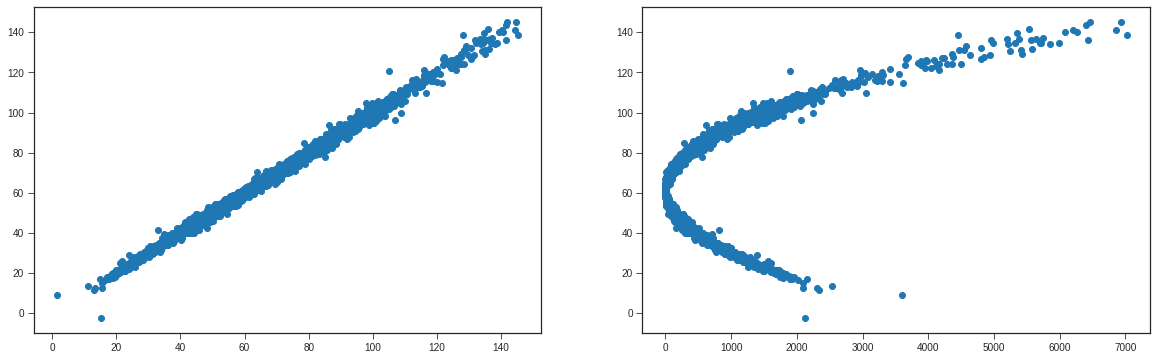

In [ ]:
# Comapring The Overfit model and Current model

fig , (ax1,ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(20,6)                               
                                  )

ax1.scatter(data_missing["Open"],data_missing["Close"])
ax2.scatter(data_missing["new_open"],data_missing["Close"])
# ax.scatter(data_missing["new_open"],data_missing["Close"])

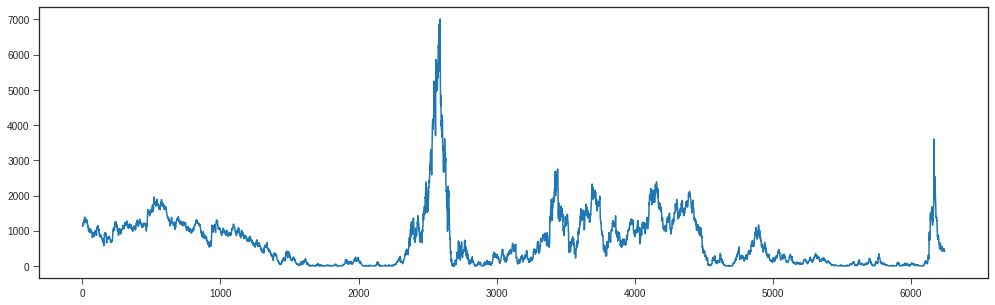

In [ ]:
data_missing["new_open"].plot(figsize = (17,5))

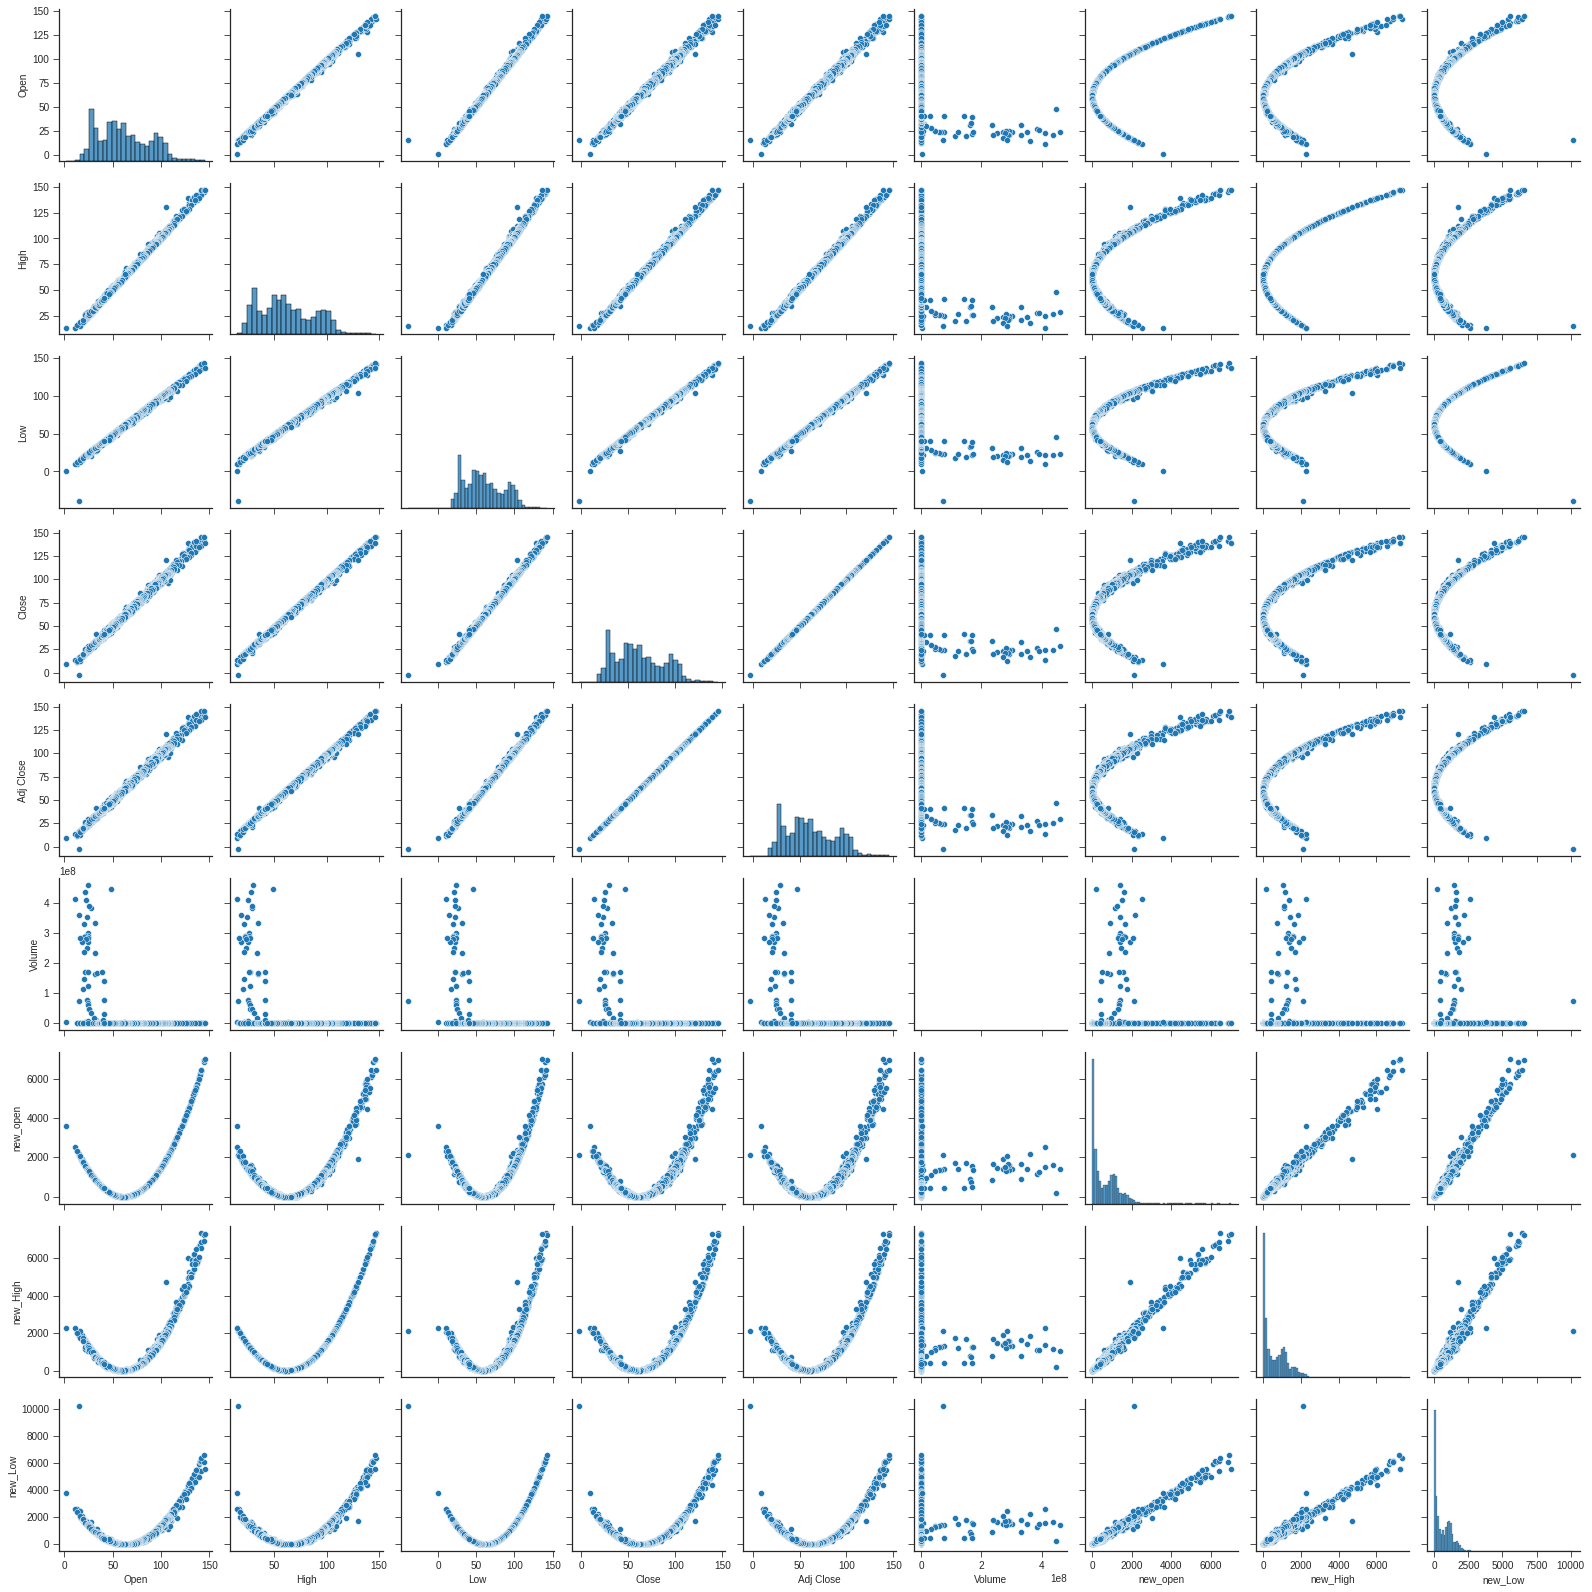

In [ ]:
sns.pairplot(data_missing)

In [ ]:
X = data_missing.drop(["Close","Open","Date","Adj Close","High","Low"],axis=1)
y  = data_missing["Close"]
X.head()

,Volume,new_open,new_High,new_Low
0,92302.0,1140.478200,1100.313040,1167.654974
1,79373.0,1140.478200,1131.714581,1173.813848
2,55693.0,1127.009813,1106.957233,1147.242461
4,59199.0,1140.478200,1115.624585,1156.745864
5,39487.0,1143.857797,1125.667308,1184.802957


**Random Forest Method**

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor




# splliting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor()
rf.fit (X_train,y_train)

# Evaluate the random 

rf.score(X_test,y_test)
print(f"The Overfitting Problem is resolved By the new model with acurrecy : ",rf.score(X_test,y_test))

The Overfitting Problem is resolved By the new model with acurrecy :  0.9301454612094948


In [ ]:
X.head()

,Volume,new_open,new_High,new_Low
0,92302.0,1140.478200,1100.313040,1167.654974
1,79373.0,1140.478200,1131.714581,1173.813848
2,55693.0,1127.009813,1106.957233,1147.242461
4,59199.0,1140.478200,1115.624585,1156.745864
5,39487.0,1143.857797,1125.667308,1184.802957


In [ ]:
# droping the date feature...
dataset = data_LSTM.drop("Date", axis=1)
dataset

,Open,High,Low,Close,Adj Close,Volume
0,27.650000,28.250000,27.250000,27.459999,27.459999,92302.0
1,27.650000,27.780001,27.160000,27.309999,27.309999,79373.0
2,27.850000,28.150000,27.549999,27.980000,27.980000,55693.0
4,27.650000,28.020000,27.410000,27.730000,27.730000,59199.0
5,27.600000,27.870001,27.000000,27.080000,27.080000,39487.0
...,...,...,...,...,...,...
6239,40.900002,41.139999,40.520000,40.759998,40.759998,77425275.0
6240,40.740002,40.900002,40.020000,40.570000,40.570000,28236139.0
6241,40.639999,40.650002,40.459999,40.630001,40.630001,7030.0
6242,40.360001,40.910000,39.830002,40.650002,40.650002,8747221.0


In [ ]:
# Outlier detection
up_b = dataset["Close"].mean() + 2*dataset["Close"].std()
low_b = dataset["Close"].mean() - 2*dataset["Close"].std()

In [ ]:
# Replace outliers by interpolarion for base consumption
dataset.loc[dataset["Close"] > up_b ,"Close"] = np.nan
dataset.loc[dataset["Close"] < low_b ,"Close"] = np.nan
dataset["Close"].interpolate(inplace = True)

In [ ]:
# split dataset into train and test data...
train_size = int(len(dataset)*0.8)
train_dataset, test_dataset = dataset.iloc[:train_size], dataset.iloc[train_size:]

Dimension of train data : (4079, 6)
Dimension of test data : (1020, 6)


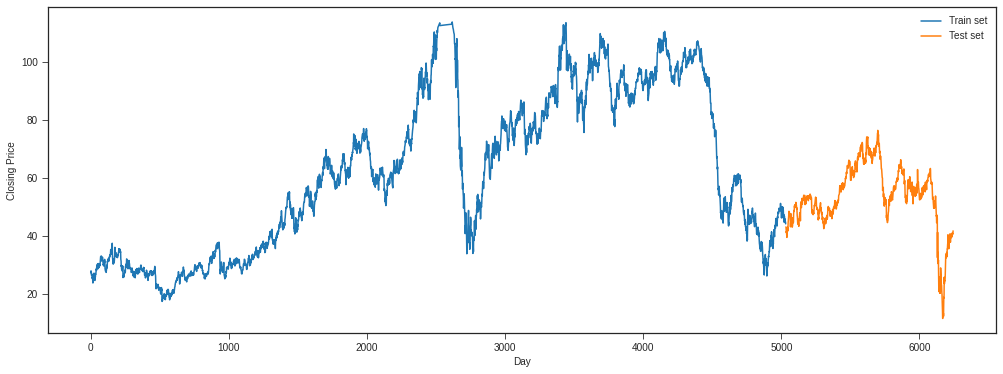

In [ ]:
# Plot train and test data

plt.figure(figsize=(17,6))
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel("Day")
plt.ylabel("Closing Price")
plt.legend(['Train set' , 'Test set'], loc = 'upper right')

print("Dimension of train data :", train_dataset.shape)
print("Dimension of test data :", test_dataset.shape)

In [ ]:
# Split the target variable and dependent variables..

# Split train data into x and y

x_train = train_dataset.drop('Close',axis=1)
y_train = train_dataset.loc[:,["Close"]]

In [ ]:
# Split test data to x and y

x_test = test_dataset.drop("Close", axis=1)
y_test = test_dataset.loc[:,["Close"]]

In [ ]:
x_train.shape

(4079, 5)

In [ ]:
x_train.head()

,Open,High,Low,Adj Close,Volume
0,27.65,28.250000,27.250000,27.459999,92302.0
1,27.65,27.780001,27.160000,27.309999,79373.0
2,27.85,28.150000,27.549999,27.980000,55693.0
4,27.65,28.020000,27.410000,27.730000,59199.0
5,27.60,27.870001,27.000000,27.080000,39487.0


In [ ]:
x_test.shape

(1020, 5)

In [ ]:
y_train.shape

(4079, 1)

In [ ]:
y_test.shape

(1020, 1)

In [ ]:
# Data Transformation...
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Different scaler for input and output

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [ ]:
# Fit the Scaler using available training data...

input_scaler = scaler_x.fit(x_train)
output_scaler = scaler_y.fit(y_train)

In [ ]:
# Apply the scaler using available training data

train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(x_train)

In [ ]:
# Apply the scaler to test data

test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(x_test)

In [ ]:
x_test.head()

,Open,High,Low,Adj Close,Volume
5033,44.200001,44.369999,42.970001,43.130001,428407.0
5034,43.070000,43.389999,42.360001,42.919998,389837.0
5035,42.660000,43.200001,41.680000,41.919998,461324.0
5036,41.930000,42.220001,41.040001,41.139999,537390.0
5037,41.119999,41.669998,40.570000,41.599998,447913.0


In [ ]:
x_train.head()

,Open,High,Low,Adj Close,Volume
0,27.65,28.250000,27.250000,27.459999,92302.0
1,27.65,27.780001,27.160000,27.309999,79373.0
2,27.85,28.150000,27.549999,27.980000,55693.0
4,27.65,28.020000,27.410000,27.730000,59199.0
5,27.60,27.870001,27.000000,27.080000,39487.0


In [ ]:
# Create a 3D input Dataset

def create_dataset (x,y,time_steps = 1):
  xs,ys = [],[]
  for i in range(len(x) - time_steps):
    v = x[i:i+time_steps, :]
    xs.append(v)
    ys.append(y[i+time_steps])
  return np.array(xs), np.array(ys)

TIME_STEPS = 30

X_test, Y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, Y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)

print('X_train.shape: ', X_test.shape)
print('Y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)
print('Y_test.shape: ', Y_train.shape)

X_train.shape:  (990, 30, 5)
Y_train.shape:  (4049, 1)
X_test.shape:  (990, 30, 5)
Y_test.shape:  (4049, 1)


In [ ]:
# Create LSTM model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers,callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [ ]:
data_LSTM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0


In [ ]:
data_LSTM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6239,2020-07-16,40.900002,41.139999,40.520000,40.759998,40.759998,77425275.0
6240,2020-07-17,40.740002,40.900002,40.020000,40.570000,40.570000,28236139.0
6241,2020-07-19,40.639999,40.650002,40.459999,40.630001,40.630001,7030.0
6242,2020-07-20,40.360001,40.910000,39.830002,40.650002,40.650002,8747221.0
6243,2020-07-21,40.840000,42.400002,40.840000,41.759998,41.759998,1323868.0


In [ ]:
# # split dataset into train and test data...
# train_size = int(len(data_LSTM)*0.8)
# train_dataset, test_dataset = dataset.iloc[:train_size].values, dataset.iloc[train_size:].values

In [ ]:
training_set = data_LSTM.iloc[:800, 1:2].values
test_set = data_LSTM.iloc[800:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 9s 118ms/step - loss: 0.0467
Epoch 2/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0147
Epoch 3/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0118
Epoch 4/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0115
Epoch 5/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0111
Epoch 6/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0100
Epoch 7/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0102
Epoch 8/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0091
Epoch 9/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0093
Epoch 10/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0097
Epoch 11/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0089
Epoch 12/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0088
Epoch 13/100


In [ ]:

dataset_train = data_LSTM.iloc[:800, 1:2]
dataset_test = data_LSTM.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

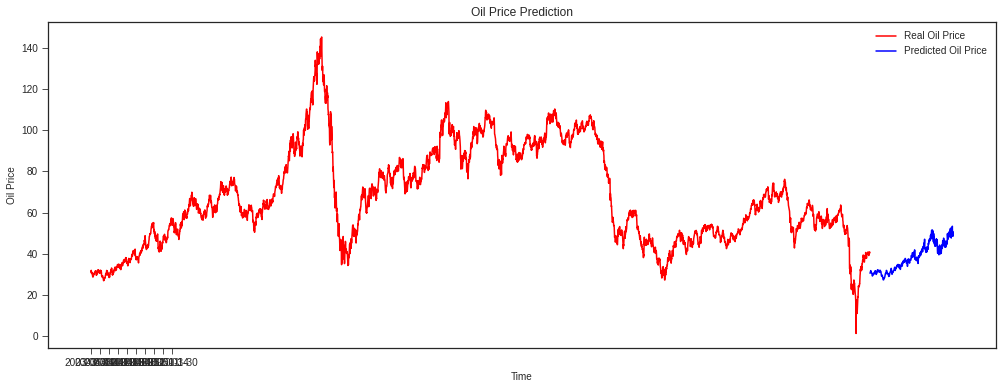

In [ ]:
# Visualising the results
plt.figure(figsize=(17,6))
plt.plot(data_LSTM.loc[1005:, 'Date'].values,dataset_test.values, color = 'red', label = 'Real Oil Price')
plt.plot(data_LSTM.loc[:578, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Oil Price')
plt.xticks(np.arange(0,459,50))
plt.title('Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

In [ ]:
# Define a function to calculate MAE and RMSE
import numpy as np

def evaluate_prediction(predictions, actual):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    print("Rmse",rmse)
    mae = np.abs(errors).mean()

In [ ]:
evaluate_prediction(predicted_stock_price, test_set[:459])

Rmse 2.1350547918830514
